# Cats vs Dogs Assignment

## Data preparation
- Create a supersmall dataset with 1000 training, 500 validatiion, and 500 testing. --> Base Model
- Create a small dataset with 2000 traning, 500 validation, and 500 testing. --> Adjust Base Model, Improved Adjust Base Model 
- Create a cleaned full dataset. --> Improved Model, and Pretained Model

In [69]:
from PIL import Image
import os

# Define the dataset directories
dataset_dirs = [
    "/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Cat",
    "/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Dog",
]

# Function to check and delete non-standard images
def remove_nonstandard_images(directories):
    for dir_path in directories:
        for img_name in os.listdir(dir_path):
            img_path = os.path.join(dir_path, img_name)
            try:
                with Image.open(img_path) as img:
                    # Check if image has 2 channels
                    if img.mode not in ["RGB", "L", "RGBA"]:  # Only accept standard modes
                        print(f"Removing non-standard image: {img_path}")
                        os.remove(img_path)
            except Exception as e:
                print(f"Error with image {img_path}: {e}")

# Run the function
remove_nonstandard_images(dataset_dirs)
print("Non-standard images removed.")


Error with image /Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Cat/.DS_Store: cannot identify image file '/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Cat/.DS_Store'
Error with image /Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Dog/.DS_Store: cannot identify image file '/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Dog/.DS_Store'
Non-standard images removed.


### Super small dataset
- Trainning: 1000 obvs
- Validation: 500 obvs
- Testing: 500 obvs

In [70]:
import os
import random
import shutil
from pathlib import Path
from PIL import Image

# Define source directories
cats_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Cat")
dogs_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Dog")

# Define destination directory structure
subset_base_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_supersmall")
train_dir = subset_base_dir / "train"
validation_dir = subset_base_dir / "validation"
test_dir = subset_base_dir / "test"

# Create necessary subdirectories for Train, Validation, and Test splits
for split_dir in [train_dir, validation_dir, test_dir]:
    (split_dir / "Cat").mkdir(parents=True, exist_ok=True)
    (split_dir / "Dog").mkdir(parents=True, exist_ok=True)

def copy_images_no_overlap(src_dir, train_dest, val_dest, test_dest, train_count, val_count, test_count):
    """Copy non-corrupt images from src_dir to destination directories without overlap."""
    all_images = list(src_dir.glob("*.jpg"))
    random.shuffle(all_images)

    train_images = []
    val_images = []
    test_images = []

    for image_path in all_images:
        try:
            # Check for non-corrupted images
            with Image.open(image_path) as img:
                img.verify()

            # Add images to each subset, without exceeding the specified count
            if len(train_images) < train_count:
                train_images.append(image_path)
            elif len(val_images) < val_count:
                val_images.append(image_path)
            elif len(test_images) < test_count:
                test_images.append(image_path)

            # Stop if all subsets are filled
            if len(train_images) == train_count and len(val_images) == val_count and len(test_images) == test_count:
                break

        except (IOError, SyntaxError) as e:
            print(f"Skipped corrupted file: {image_path}")

    # Copy selected images to respective directories
    for img_path in train_images:
        shutil.copy(img_path, train_dest / img_path.name)
    for img_path in val_images:
        shutil.copy(img_path, val_dest / img_path.name)
    for img_path in test_images:
        shutil.copy(img_path, test_dest / img_path.name)

# Distribute cat and dog images into training, validation, and testing folders without overlap
copy_images_no_overlap(cats_dir, train_dir / "Cat", validation_dir / "Cat", test_dir / "Cat", 500, 250, 250)
copy_images_no_overlap(dogs_dir, train_dir / "Dog", validation_dir / "Dog", test_dir / "Dog", 500, 250, 250)

print("Dataset successfully created without corrupted files and without overlap!")

Dataset successfully created without corrupted files and without overlap!


### Small dataset
- Trainning: 2000 obvs
- Validation: 500 obvs
- Testing: 500 obvs

In [71]:
import os
import random
import shutil
from pathlib import Path
from PIL import Image

# Define source directories
cats_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Cat")
dogs_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Dog")

# Define destination directory structure
subset_base_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_small")
train_dir = subset_base_dir / "train"
validation_dir = subset_base_dir / "validation"
test_dir = subset_base_dir / "test"

# Create necessary subdirectories for Train, Validation, and Test splits
for split_dir in [train_dir, validation_dir, test_dir]:
    (split_dir / "Cat").mkdir(parents=True, exist_ok=True)
    (split_dir / "Dog").mkdir(parents=True, exist_ok=True)

def copy_images_no_overlap(src_dir, train_dest, val_dest, test_dest, train_count, val_count, test_count):
    """Copy non-corrupt images from src_dir to destination directories without overlap."""
    all_images = list(src_dir.glob("*.jpg"))
    random.shuffle(all_images)

    train_images = []
    val_images = []
    test_images = []

    for image_path in all_images:
        try:
            # Check for non-corrupted images
            with Image.open(image_path) as img:
                img.verify()

            # Add images to each subset, without exceeding the specified count
            if len(train_images) < train_count:
                train_images.append(image_path)
            elif len(val_images) < val_count:
                val_images.append(image_path)
            elif len(test_images) < test_count:
                test_images.append(image_path)

            # Stop if all subsets are filled
            if len(train_images) == train_count and len(val_images) == val_count and len(test_images) == test_count:
                break

        except (IOError, SyntaxError) as e:
            print(f"Skipped corrupted file: {image_path}")

    # Copy selected images to respective directories
    for img_path in train_images:
        shutil.copy(img_path, train_dest / img_path.name)
    for img_path in val_images:
        shutil.copy(img_path, val_dest / img_path.name)
    for img_path in test_images:
        shutil.copy(img_path, test_dest / img_path.name)

# Distribute cat and dog images into training, validation, and testing folders without overlap
copy_images_no_overlap(cats_dir, train_dir / "Cat", validation_dir / "Cat", test_dir / "Cat", 1000, 250, 250)
copy_images_no_overlap(dogs_dir, train_dir / "Dog", validation_dir / "Dog", test_dir / "Dog", 1000, 250, 250)

print("Dataset successfully created without corrupted files and without overlap!")

Dataset successfully created without corrupted files and without overlap!


### Large dataset
- Traning: 12000 obvs
- Validation: 4000 obvs
- Testing: 4000 obvs

In [83]:
import os
import random
import shutil
from pathlib import Path
from PIL import Image

# Define source directories
cats_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Cat")
dogs_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/Kaggle_cats_vs_dogs/Dog")

# Define destination directory structure
subset_base_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_large")
train_dir = subset_base_dir / "train"
validation_dir = subset_base_dir / "validation"
test_dir = subset_base_dir / "test"

# Create necessary subdirectories for Train, Validation, and Test splits
for split_dir in [train_dir, validation_dir, test_dir]:
    (split_dir / "Cat").mkdir(parents=True, exist_ok=True)
    (split_dir / "Dog").mkdir(parents=True, exist_ok=True)

def copy_images_no_overlap(src_dir, train_dest, val_dest, test_dest, train_count, val_count, test_count):
    """Copy non-corrupt images from src_dir to destination directories without overlap."""
    all_images = list(src_dir.glob("*.jpg"))
    random.shuffle(all_images)

    train_images = []
    val_images = []
    test_images = []

    for image_path in all_images:
        try:
            # Check for non-corrupted images
            with Image.open(image_path) as img:
                img.verify()

            # Add images to each subset, without exceeding the specified count
            if len(train_images) < train_count:
                train_images.append(image_path)
            elif len(val_images) < val_count:
                val_images.append(image_path)
            elif len(test_images) < test_count:
                test_images.append(image_path)

            # Stop if all subsets are filled
            if len(train_images) == train_count and len(val_images) == val_count and len(test_images) == test_count:
                break

        except (IOError, SyntaxError) as e:
            print(f"Skipped corrupted file: {image_path}")

    # Copy selected images to respective directories
    for img_path in train_images:
        shutil.copy(img_path, train_dest / img_path.name)
    for img_path in val_images:
        shutil.copy(img_path, val_dest / img_path.name)
    for img_path in test_images:
        shutil.copy(img_path, test_dest / img_path.name)

# Distribute cat and dog images into training, validation, and testing folders without overlap
copy_images_no_overlap(cats_dir, train_dir / "Cat", validation_dir / "Cat", test_dir / "Cat", 6000, 2000, 2000)
copy_images_no_overlap(dogs_dir, train_dir / "Dog", validation_dir / "Dog", test_dir / "Dog", 6000, 2000, 2000)

print("Dataset successfully created without corrupted files and without overlap!")

Dataset successfully created without corrupted files and without overlap!


## Base Model
- training set: 1000 observations
- validation set: 500 observations
- testing set: 500 observations

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


2024-11-04 13:13:33.340463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


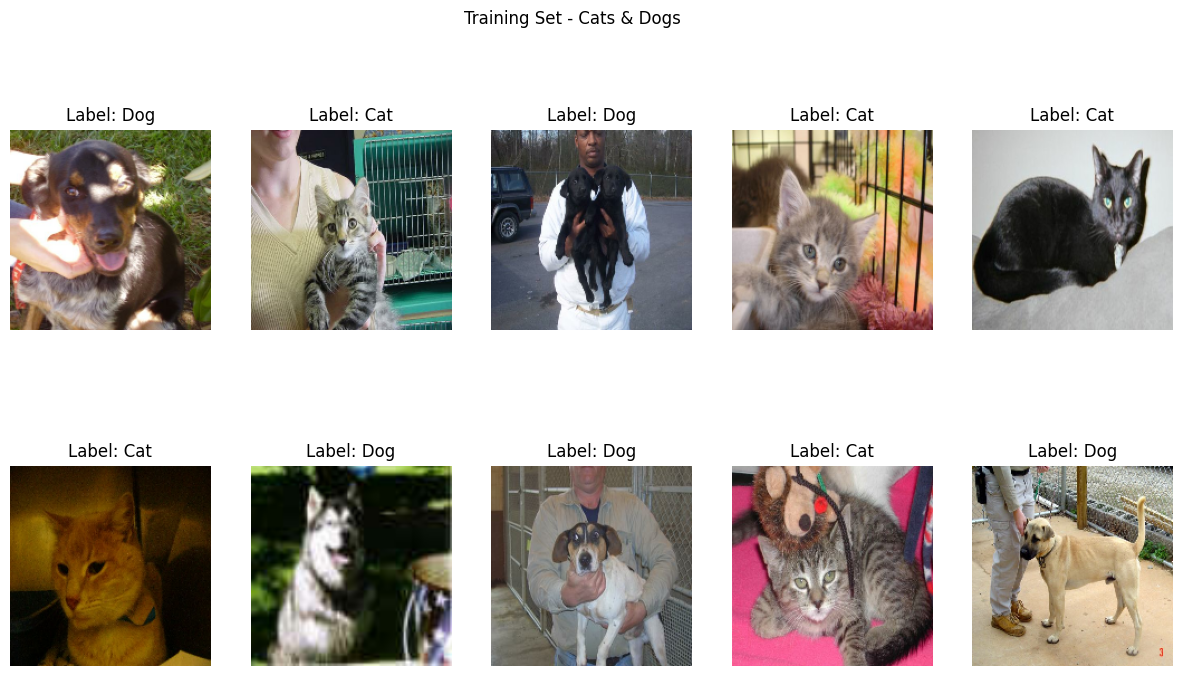

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
2024-11-04 13:13:33.950361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


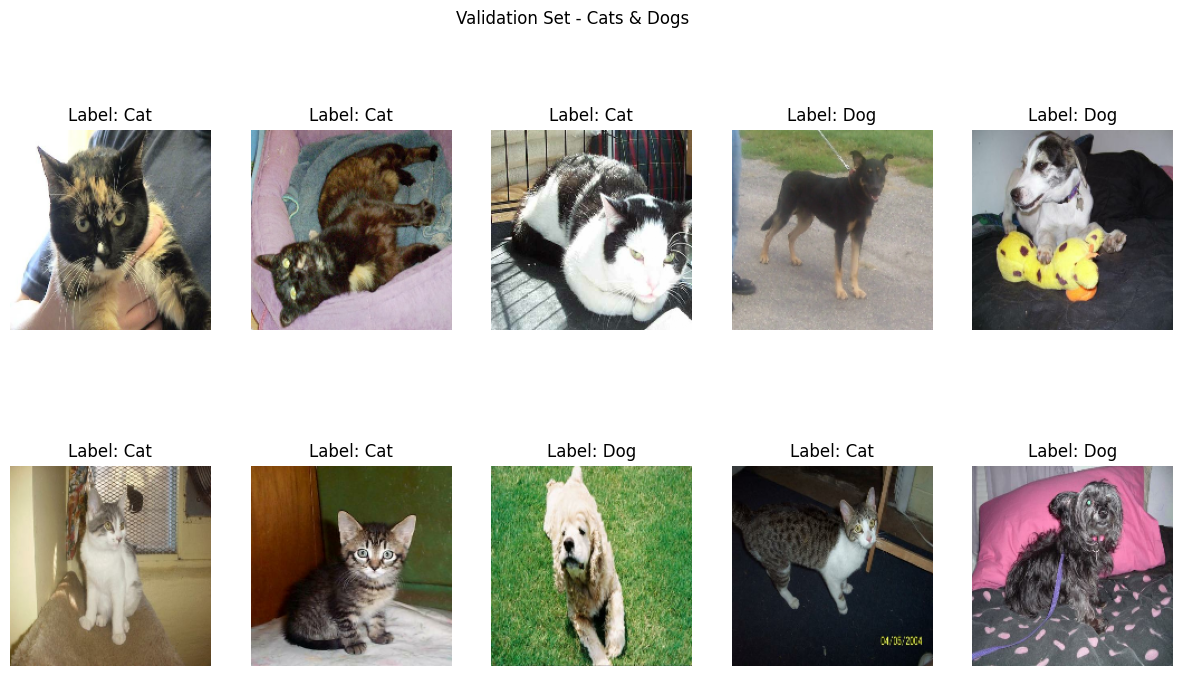

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
2024-11-04 13:13:34.698067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


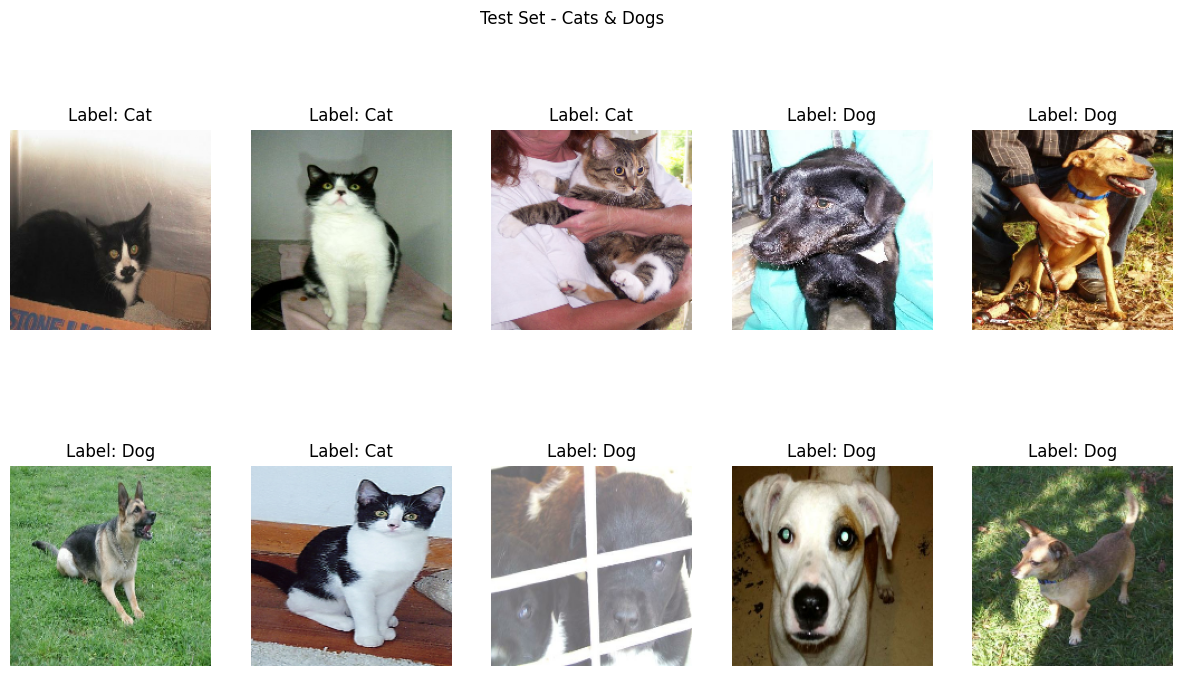

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

base_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_supersmall")
base_model_train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(180, 180),
    batch_size=32)

base_model_validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

base_model_test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

# Function to plot images from a dataset
def plot_sample_images(dataset, title, num_images=10):
    plt.figure(figsize=(15, 8))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(image[0] / 255.0)  # Scale pixel values if needed
        plt.title(f"Label: {'Dog' if label[0].numpy() == 1 else 'Cat'}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Display sample images from each dataset
plot_sample_images(base_model_train_dataset, "Training Set - Cats & Dogs")
plot_sample_images(base_model_validation_dataset, "Validation Set - Cats & Dogs")
plot_sample_images(base_model_test_dataset, "Test Set - Cats & Dogs")

In [106]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

base_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_supersmall")
base_model_train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)
base_model_validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

base_model_test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
base_model = keras.Model(inputs=inputs, outputs=outputs)

base_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

base_model.summary()

base_model_callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="base_model.keras",
        save_best_only=True,
        monitor="val_loss"  # Tracks the validation loss
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=7,  # Stop if no improvement after 5 epochs
        restore_best_weights=True
    )
]
base_model_history = base_model.fit(
    base_model_train_dataset,
    epochs=75,
    validation_data=base_model_validation_dataset,
    callbacks=base_model_callbacks
)

# Plot training vs. validation accuracy and loss
def plot_training_history(base_model_history):
    epochs = range(1, len(base_model_history.history['accuracy']) + 1)
    
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, base_model_history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, base_model_history.history['val_accuracy'], 'b', label='Validation accuracy')
    plt.title('Base Model Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, base_model_history.history['loss'], 'ro', label='Training loss')
    plt.plot(epochs, base_model_history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Base Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_training_history(base_model_history)


Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "functional_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_93 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_48 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_249 (Conv2D)             │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_230               │ (None, 89, 89, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_250 (Conv2D)             │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_231               │ (None, 43, 43, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_251 (Conv2D)             │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_232               │ (None, 20, 20, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_252 (Conv2D)             │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_233               │ (None, 9, 9, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_253 (Conv2D)             │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_53 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4864 - loss: 0.7173

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.4867 - loss: 0.7168 - val_accuracy: 0.5020 - val_loss: 0.6924
Epoch 2/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5108 - loss: 0.6948

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5110 - loss: 0.6948 - val_accuracy: 0.5120 - val_loss: 0.6919
Epoch 3/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.4879 - loss: 0.6941 - val_accuracy: 0.6300 - val_loss: 0.6914
Epoch 4/75


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5346 - loss: 0.6921

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5343 - loss: 0.6922 - val_accuracy: 0.5260 - val_loss: 0.6848
Epoch 5/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.5453 - loss: 0.6899 - val_accuracy: 0.6460 - val_loss: 0.6749
Epoch 6/75


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5671 - loss: 0.6824 - val_accuracy: 0.5160 - val_loss: 0.7987
Epoch 7/75


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5567 - loss: 0.7100

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5599 - loss: 0.7075 - val_accuracy: 0.5200 - val_loss: 0.7127
Epoch 8/75
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6261 - loss: 0.6658

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6271 - loss: 0.6647 - val_accuracy: 0.6120 - val_loss: 0.6687
Epoch 9/75
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6594 - loss: 0.6243

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6609 - loss: 0.6236 - val_accuracy: 0.6660 - val_loss: 0.6264
Epoch 10/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6988 - loss: 0.5885 - val_accuracy: 0.6300 - val_loss: 0.6416
Epoch 11/75


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.6993 - loss: 0.5879 - val_accuracy: 0.6100 - val_loss: 0.7481
Epoch 12/75


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.7230 - loss: 0.5385 - val_accuracy: 0.6580 - val_loss: 0.7271
Epoch 13/75


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7521 - loss: 0.4926 - val_accuracy: 0.7080 - val_loss: 0.6088
Epoch 14/75


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8114 - loss: 0.4467 - val_accuracy: 0.6420 - val_loss: 0.8676
Epoch 15/75
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.7188 - loss: 0.9589

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7991 - loss: 0.4753

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.8004 - loss: 0.4708 - val_accuracy: 0.5480 - val_loss: 1.4767
Epoch 16/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.8069 - loss: 0.4827 - val_accuracy: 0.6880 - val_loss: 0.6969
Epoch 17/75


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8631 - loss: 0.3142 - val_accuracy: 0.6360 - val_loss: 0.8132
Epoch 18/75
 1/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7812 - loss: 0.4356

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.8906 - loss: 0.2701 - val_accuracy: 0.7020 - val_loss: 0.7315
Epoch 19/75


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9210 - loss: 0.1957

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9206 - loss: 0.1972 - val_accuracy: 0.6780 - val_loss: 0.8456
Epoch 20/75
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9508 - loss: 0.1532 - val_accuracy: 0.6720 - val_loss: 1.0687


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6518 - loss: 0.6586

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6613 - loss: 0.6468
Test accuracy: 0.6940
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


2024-11-10 17:58:33.511954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


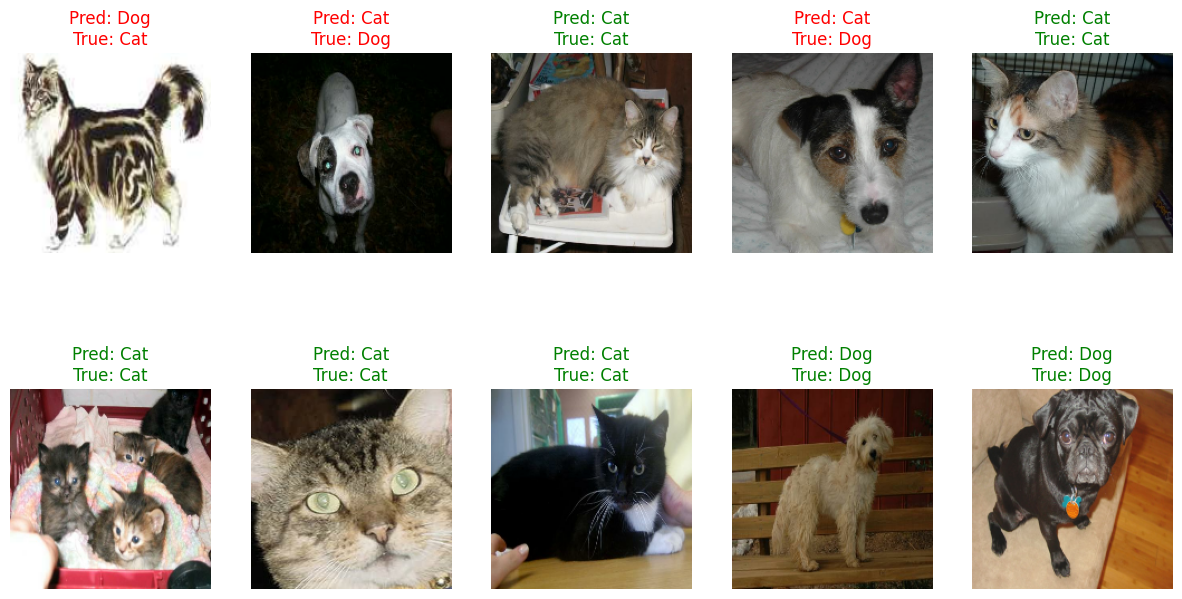

In [44]:
base_model_best_loss = keras.models.load_model("base_model.keras")
base_model_test_loss, base_model_test_acc = base_model_best_loss.evaluate(base_model_test_dataset)
print(f"Test accuracy: {base_model_test_acc:.4f}")

# Generate and plot confusion matrix
#base_model_best_loss_predictions = base_model_best_loss.predict(base_model_test_dataset)
#base_model_best_loss_predicted_labels = np.where(base_model_best_loss_predictions > 0.5, 1, 0).flatten()  # Binary classification
#base_model_best_loss_true_labels = np.concatenate([y for x, y in base_model_test_dataset], axis=0)

#print(classification_report(base_model_best_loss_true_labels, base_model_best_loss_predicted_labels))

#base_model_best_loss_cm = confusion_matrix(base_model_best_loss_true_labels, base_model_best_loss_predicted_labels)
#base_model_best_loss_disp = ConfusionMatrixDisplay(confusion_matrix=base_model_best_loss_cm, display_labels=base_model_test_dataset.class_names)
#base_model_best_loss_disp.plot(cmap=plt.cm.Blues)
#plt.title("Base Model (Best Loss) Confusion Matrix for Cats vs Dogs")
#plt.show()

# Function to visualize predictions
def plot_predictions(model, dataset, class_names, num_images=10):
    plt.figure(figsize=(15, 8))
    for images, labels in dataset.take(1):  # Take a single batch
        predictions = model.predict(images)
        predicted_labels = np.where(predictions.flatten() > 0.5, 1, 0)  # Apply cutoff for binary classification

        for i in range(num_images):
            ax = plt.subplot(2, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[int(labels[i])]
            predicted_label = class_names[predicted_labels[i]]
            color = "green" if predicted_label == true_label else "red"
            plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
            plt.axis("off")
    plt.show()

# Define class names based on your dataset structure
class_names = base_model_test_dataset.class_names  # ['Cat', 'Dog'] based on folder names

# Visualize predictions on the test dataset
plot_predictions(base_model_best_loss, base_model_test_dataset, class_names)

## Adjust Base Model
- Use small dataset
 - training set: 1000 observations
 - validation set: 500 observations
 - testing set: 500 observations

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

base_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_small")
adj_base_model_train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(180, 180),
    batch_size=32)

adj_base_model_validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

adj_base_model_test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    batch_size=32)


inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
adj_base_model = keras.Model(inputs=inputs, outputs=outputs)

adj_base_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

adj_base_model.summary()

adj_base_model_callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="adj_base_model.keras",
        save_best_only=True,
        monitor="val_loss"  # Tracks the validation loss
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=7,  # Stop if no improvement after 5 epochs
        restore_best_weights=True
    )
]

adj_base_model_history = adj_base_model.fit(
    adj_base_model_train_dataset,
    epochs=100,
    validation_data=adj_base_model_validation_dataset,
    callbacks=adj_base_model_callbacks
)

# Plot training vs. validation accuracy and loss
def plot_training_history(adj_base_model_history):
    epochs = range(1, len(adj_base_model_history.history['accuracy']) + 1)
    
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, adj_base_model_history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, adj_base_model_history.history['val_accuracy'], 'b', label='Validation accuracy')
    plt.title('Base Model Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, adj_base_model_history.history['loss'], 'ro', label='Training loss')
    plt.plot(epochs, adj_base_model_history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Base Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_training_history(adj_base_model_history)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
41/63 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5030 - loss: 0.7095

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.5111 - loss: 0.7066 - val_accuracy: 0.6120 - val_loss: 0.6922
Epoch 2/100
41/63 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5488 - loss: 0.6919

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.5442 - loss: 0.6935 - val_accuracy: 0.5040 - val_loss: 0.6865
Epoch 3/100
38/63 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5497 - loss: 0.6792

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.5617 - loss: 0.6792 - val_accuracy: 0.5900 - val_loss: 0.6582
Epoch 4/100
59/63 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6401 - loss: 0.6400

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6404 - loss: 0.6409 - val_accuracy: 0.6520 - val_loss: 0.6047
Epoch 5/100
39/63 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6926 - loss: 0.5927

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.6825 - loss: 0.5995 - val_accuracy: 0.6760 - val_loss: 0.5956
Epoch 6/100
39/63 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6660 - loss: 0.5881

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6723 - loss: 0.5858 - val_accuracy: 0.6840 - val_loss: 0.5912
Epoch 7/100
41/63 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7114 - loss: 0.5718

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.7152 - loss: 0.5676 - val_accuracy: 0.6760 - val_loss: 0.6130
Epoch 8/100
40/63 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7119 - loss: 0.5586

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.7226 - loss: 0.5456 - val_accuracy: 0.6980 - val_loss: 0.5752
Epoch 9/100
46/63 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7596 - loss: 0.5131

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.7619 - loss: 0.5086 - val_accuracy: 0.7340 - val_loss: 0.5929
Epoch 10/100
33/63 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7433 - loss: 0.5263

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.7559 - loss: 0.5093 - val_accuracy: 0.7460 - val_loss: 0.5366
Epoch 11/100
51/63 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7778 - loss: 0.4816

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.7816 - loss: 0.4752 - val_accuracy: 0.7340 - val_loss: 0.5230
Epoch 12/100
46/63 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8225 - loss: 0.3907

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8217 - loss: 0.3917 - val_accuracy: 0.6820 - val_loss: 0.7677
Epoch 13/100
50/63 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8109 - loss: 0.4119

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8158 - loss: 0.4035 - val_accuracy: 0.7660 - val_loss: 0.5623
Epoch 14/100
37/63 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8582 - loss: 0.3178

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8578 - loss: 0.3160 - val_accuracy: 0.7400 - val_loss: 0.6304
Epoch 15/100
34/63 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8712 - loss: 0.2902

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8752 - loss: 0.2819 - val_accuracy: 0.7340 - val_loss: 0.6331
Epoch 16/100
44/63 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8889 - loss: 0.2427

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8932 - loss: 0.2391 - val_accuracy: 0.6420 - val_loss: 1.0253
Epoch 17/100
33/63 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9068 - loss: 0.2503

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9134 - loss: 0.2201 - val_accuracy: 0.7520 - val_loss: 0.8471
Epoch 18/100
35/63 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9301 - loss: 0.1523

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9365 - loss: 0.1425 - val_accuracy: 0.7220 - val_loss: 0.9948


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7150 - loss: 0.5609
Test accuracy: 0.7220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


2024-11-10 18:10:58.557539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


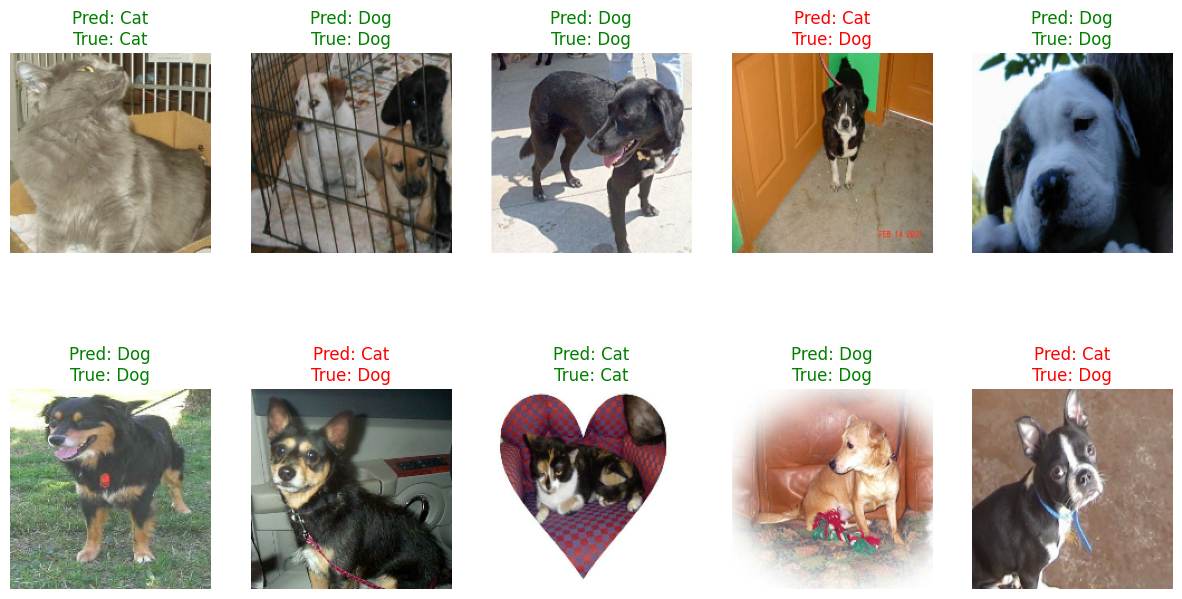

In [48]:
adj_base_model_best_loss = keras.models.load_model("adj_base_model.keras")
adj_base_model_test_loss, adj_base_model_test_acc = adj_base_model_best_loss.evaluate(adj_base_model_test_dataset)
print(f"Test accuracy: {adj_base_model_test_acc:.4f}")

# Generate and plot confusion matrix
#adj_base_model_best_loss_predictions = adj_base_model_best_loss.predict(adj_base_model_test_dataset)
#adj_base_model_best_loss_predicted_labels = np.where(adj_base_model_best_loss_predictions > 0.5, 1, 0).flatten()  # Binary classification
#adj_base_model_best_loss_true_labels = np.concatenate([y for x, y in adj_base_model_test_dataset], axis=0)

#print(classification_report(adj_base_model_best_loss_true_labels, adj_base_model_best_loss_predicted_labels))

#adj_base_model_best_loss_cm = confusion_matrix(adj_base_model_best_loss_true_labels, adj_base_model_best_loss_predicted_labels)
#adj_base_model_best_loss_disp = ConfusionMatrixDisplay(confusion_matrix=adj_base_model_best_loss_cm, display_labels=adj_base_model_test_dataset.class_names)
#adj_base_model_best_loss_disp.plot(cmap=plt.cm.Blues)
#plt.title("Adjusted Base Model (Best Loss) Confusion Matrix for Cats vs Dogs")
#plt.show()

# Function to visualize predictions
def plot_predictions(model, dataset, class_names, num_images=10):
    plt.figure(figsize=(15, 8))
    for images, labels in dataset.take(1):  # Take a single batch
        predictions = model.predict(images)
        predicted_labels = np.where(predictions.flatten() > 0.5, 1, 0)  # Apply cutoff for binary classification

        for i in range(num_images):
            ax = plt.subplot(2, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[int(labels[i])]
            predicted_label = class_names[predicted_labels[i]]
            color = "green" if predicted_label == true_label else "red"
            plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
            plt.axis("off")
    plt.show()

# Define class names based on your dataset structure
class_names = adj_base_model_test_dataset.class_names  # ['Cat', 'Dog'] based on folder names

# Visualize predictions on the test dataset
plot_predictions(adj_base_model_best_loss, adj_base_model_test_dataset, class_names)

## Improved Adjusted Base Model
- Training set: 2000 observations
- Validation set: 500 observations
- Testing set: 500 observations
- Compare to Adjust Base Model
    - Add data augmentation
    - Add one more layer of Conv2D with 512 nodes and maxpooling
    - Add one more Dense with 256 nodes layer
    - Add Global Average Pooling 2D in output block
    - Change Opimizer from "rsmprop" to "adam"

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Load the pre-split dataset with data augmentation for training
base_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_small")
improved_adj_base_model_train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)
improved_adj_base_model_validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

improved_adj_base_model_test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2)
    ]
)

inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

improved_adj_base_model = keras.Model(inputs=inputs, outputs=outputs)

improved_adj_base_model.summary()

# Compile the model with a learning rate reduction callback
improved_adj_base_model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

improved_adj_base_model_callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="improved_adj_base_model.keras",
        save_best_only=True,
        monitor="val_loss"  # Tracks the validation loss
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=7,  # Stop if no improvement after 5 epochs
        restore_best_weights=True
    )
]

improved_adj_base_model_history = improved_adj_base_model.fit(
    improved_adj_base_model_train_dataset,
    epochs=100,
    callbacks=improved_adj_base_model_callbacks,
    validation_data=improved_adj_base_model_validation_dataset
)

# Plot training vs. validation accuracy and loss
def plot_training_history(improved_adj_base_model_history):
    epochs = range(1, len(improved_adj_base_model_history.history['accuracy']) + 1)
    
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, improved_adj_base_model_history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, improved_adj_base_model_history.history['val_accuracy'], 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, improved_adj_base_model_history.history['loss'], 'ro', label='Training loss')
    plt.plot(epochs, improved_adj_base_model_history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_training_history(improved_adj_base_model_history)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3, 3, 256)      │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,700,161 (6.49 MB)

 Trainable params: 1,700,161 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
19/63 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5031 - loss: 0.6919

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5300 - val_loss: 0.6885
Epoch 2/100
18/63 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5515 - loss: 0.6899

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5408 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 3/100
27/63 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4941 - loss: 0.6987

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5130 - loss: 0.6921 - val_accuracy: 0.5540 - val_loss: 0.6753
Epoch 4/100
22/63 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5348 - loss: 0.6901

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5102 - loss: 0.6902 - val_accuracy: 0.4980 - val_loss: 0.6820
Epoch 5/100
31/63 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5036 - loss: 0.6872

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.5187 - loss: 0.6876 - val_accuracy: 0.5140 - val_loss: 0.6928
Epoch 6/100
21/63 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5455 - loss: 0.6924

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5534 - loss: 0.6905 - val_accuracy: 0.5720 - val_loss: 0.6796
Epoch 7/100
19/63 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.5924 - loss: 0.6869

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.5731 - loss: 0.6870 - val_accuracy: 0.5580 - val_loss: 0.6861
Epoch 8/100
25/63 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5600 - loss: 0.6858

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.5669 - loss: 0.6854 - val_accuracy: 0.6140 - val_loss: 0.6763
Epoch 9/100
45/63 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5989 - loss: 0.6738

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.6028 - loss: 0.6706 - val_accuracy: 0.6340 - val_loss: 0.6585
Epoch 10/100
42/63 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.5963 - loss: 0.6652

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.6050 - loss: 0.6621 - val_accuracy: 0.6060 - val_loss: 0.6580
Epoch 11/100
20/63 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6025 - loss: 0.6630

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.6206 - loss: 0.6524 - val_accuracy: 0.6680 - val_loss: 0.6358
Epoch 12/100
37/63 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.6035 - loss: 0.6664

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.6031 - loss: 0.6652 - val_accuracy: 0.6360 - val_loss: 0.6278
Epoch 13/100
21/63 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.6459 - loss: 0.6448

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.6394 - loss: 0.6445 - val_accuracy: 0.6640 - val_loss: 0.6234
Epoch 14/100
25/63 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5852 - loss: 0.6526

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.6082 - loss: 0.6410 - val_accuracy: 0.6120 - val_loss: 0.6354
Epoch 15/100
29/63 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.6388 - loss: 0.6251

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.6371 - loss: 0.6271 - val_accuracy: 0.6760 - val_loss: 0.6195
Epoch 16/100
22/63 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6548 - loss: 0.6198

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.6549 - loss: 0.6201 - val_accuracy: 0.6880 - val_loss: 0.6204
Epoch 17/100
28/63 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.6431 - loss: 0.6358

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.6553 - loss: 0.6283 - val_accuracy: 0.6640 - val_loss: 0.6050
Epoch 18/100
26/63 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6250 - loss: 0.6483

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.6406 - loss: 0.6433 - val_accuracy: 0.7020 - val_loss: 0.5991
Epoch 19/100
26/63 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6612 - loss: 0.6241

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6729 - loss: 0.6111 - val_accuracy: 0.6920 - val_loss: 0.6101
Epoch 20/100
19/63 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6583 - loss: 0.6032

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6752 - loss: 0.5975 - val_accuracy: 0.6700 - val_loss: 0.6233
Epoch 21/100
21/63 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.7007 - loss: 0.5812

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.6918 - loss: 0.5907 - val_accuracy: 0.7100 - val_loss: 0.5857
Epoch 22/100
19/63 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.6663 - loss: 0.6083

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6878 - loss: 0.5894 - val_accuracy: 0.7040 - val_loss: 0.6059
Epoch 23/100
25/63 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6874 - loss: 0.6095

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.6895 - loss: 0.6054 - val_accuracy: 0.6880 - val_loss: 0.6186
Epoch 24/100
20/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7035 - loss: 0.5740

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.7069 - loss: 0.5803 - val_accuracy: 0.7180 - val_loss: 0.5869
Epoch 25/100
18/63 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.6800 - loss: 0.6151

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.6951 - loss: 0.5878 - val_accuracy: 0.7040 - val_loss: 0.5865
Epoch 26/100
23/63 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.7061 - loss: 0.5975

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.7175 - loss: 0.5820 - val_accuracy: 0.6800 - val_loss: 0.5983
Epoch 27/100
26/63 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.7211 - loss: 0.5618

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.7225 - loss: 0.5613 - val_accuracy: 0.6540 - val_loss: 0.6555
Epoch 28/100
20/63 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6820 - loss: 0.5786

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.7108 - loss: 0.5625 - val_accuracy: 0.7420 - val_loss: 0.5584
Epoch 29/100
37/63 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.7315 - loss: 0.5559

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.7345 - loss: 0.5524 - val_accuracy: 0.7220 - val_loss: 0.5688
Epoch 30/100
23/63 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.7121 - loss: 0.5561

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7102 - loss: 0.5577 - val_accuracy: 0.7240 - val_loss: 0.5659
Epoch 31/100
27/63 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.7212 - loss: 0.5348

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.7269 - loss: 0.5360 - val_accuracy: 0.7200 - val_loss: 0.5624
Epoch 32/100
39/63 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7143 - loss: 0.5465

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7171 - loss: 0.5463 - val_accuracy: 0.7060 - val_loss: 0.5890
Epoch 33/100
26/63 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.7374 - loss: 0.5194

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.7488 - loss: 0.5200 - val_accuracy: 0.7460 - val_loss: 0.5431
Epoch 34/100
20/63 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.7396 - loss: 0.5339

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7398 - loss: 0.5293 - val_accuracy: 0.7100 - val_loss: 0.5656
Epoch 35/100
37/63 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.7151 - loss: 0.5567

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7347 - loss: 0.5402 - val_accuracy: 0.7480 - val_loss: 0.5213
Epoch 36/100
34/63 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7534 - loss: 0.5067

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7557 - loss: 0.5072 - val_accuracy: 0.7120 - val_loss: 0.5713
Epoch 37/100
19/63 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.7510 - loss: 0.5046

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.7546 - loss: 0.4969 - val_accuracy: 0.7520 - val_loss: 0.5222
Epoch 38/100
22/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7845 - loss: 0.4790

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7851 - loss: 0.4803 - val_accuracy: 0.7560 - val_loss: 0.5103
Epoch 39/100
22/63 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.7728 - loss: 0.4702

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7786 - loss: 0.4799 - val_accuracy: 0.7600 - val_loss: 0.5293
Epoch 40/100
18/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7150 - loss: 0.5455

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7450 - loss: 0.5163 - val_accuracy: 0.7560 - val_loss: 0.5287
Epoch 41/100
40/63 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7611 - loss: 0.5108

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7683 - loss: 0.5032 - val_accuracy: 0.7560 - val_loss: 0.5388
Epoch 42/100
21/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7541 - loss: 0.5630

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7734 - loss: 0.5179 - val_accuracy: 0.7800 - val_loss: 0.4989
Epoch 43/100
20/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7630 - loss: 0.4696

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.7628 - loss: 0.4881 - val_accuracy: 0.7900 - val_loss: 0.5038
Epoch 44/100
19/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7575 - loss: 0.5047

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7866 - loss: 0.4730 - val_accuracy: 0.7740 - val_loss: 0.5031
Epoch 45/100
33/63 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7735 - loss: 0.4475

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7813 - loss: 0.4490 - val_accuracy: 0.7340 - val_loss: 0.5364
Epoch 46/100
18/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7733 - loss: 0.5009

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.7910 - loss: 0.4640 - val_accuracy: 0.7880 - val_loss: 0.4852
Epoch 47/100
20/63 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.7743 - loss: 0.4792

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7932 - loss: 0.4582 - val_accuracy: 0.7840 - val_loss: 0.5067
Epoch 48/100
19/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7804 - loss: 0.4884

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.7925 - loss: 0.4686 - val_accuracy: 0.7820 - val_loss: 0.4918
Epoch 49/100
19/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7974 - loss: 0.4333

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8077 - loss: 0.4234 - val_accuracy: 0.7860 - val_loss: 0.4701
Epoch 50/100
22/63 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8020 - loss: 0.4417

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7953 - loss: 0.4458 - val_accuracy: 0.7540 - val_loss: 0.5295
Epoch 51/100
20/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7343 - loss: 0.5106

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.7699 - loss: 0.4697 - val_accuracy: 0.7460 - val_loss: 0.5628
Epoch 52/100
33/63 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.7801 - loss: 0.4845

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.7920 - loss: 0.4563 - val_accuracy: 0.7720 - val_loss: 0.5098
Epoch 53/100
41/63 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8023 - loss: 0.4244

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.8038 - loss: 0.4185 - val_accuracy: 0.8080 - val_loss: 0.4713
Epoch 54/100
23/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7826 - loss: 0.4539

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7903 - loss: 0.4359 - val_accuracy: 0.7780 - val_loss: 0.5244
Epoch 55/100
21/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7499 - loss: 0.4977

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7942 - loss: 0.4377 - val_accuracy: 0.8020 - val_loss: 0.4409
Epoch 56/100
25/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8208 - loss: 0.3964

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8216 - loss: 0.3967 - val_accuracy: 0.8020 - val_loss: 0.4402
Epoch 57/100
37/63 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8316 - loss: 0.3823

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.8343 - loss: 0.3775 - val_accuracy: 0.7960 - val_loss: 0.4878
Epoch 58/100
33/63 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8122 - loss: 0.3949

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.8209 - loss: 0.3843 - val_accuracy: 0.7720 - val_loss: 0.4748
Epoch 59/100
30/63 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.8376 - loss: 0.3752

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8403 - loss: 0.3748 - val_accuracy: 0.8140 - val_loss: 0.4783
Epoch 60/100
23/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8506 - loss: 0.3458

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8498 - loss: 0.3490 - val_accuracy: 0.8100 - val_loss: 0.4687
Epoch 61/100
25/63 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8546 - loss: 0.3349

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8515 - loss: 0.3380 - val_accuracy: 0.8080 - val_loss: 0.4649
Epoch 62/100
20/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8368 - loss: 0.3627

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.8449 - loss: 0.3524 - val_accuracy: 0.7980 - val_loss: 0.4940
Epoch 63/100
24/63 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8250 - loss: 0.3784

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.8302 - loss: 0.3708 - val_accuracy: 0.8100 - val_loss: 0.4550


In [60]:
improved_adj_base_model_best_loss = keras.models.load_model("improved_adj_base_model.keras")
improved_adj_base_model_test_loss, improved_adj_base_model_test_acc = improved_adj_base_model_best_loss.evaluate(improved_adj_base_model_test_dataset)
print(f"Test accuracy: {improved_adj_base_model_test_acc:.4f}")

# Generate and plot confusion matrix
#improved_adj_base_model_best_loss_predictions = improved_adj_base_model_best_loss.predict(improved_adj_base_model_test_dataset)
#improved_adj_base_model_best_loss_predicted_labels = np.where(improved_adj_base_model_best_loss_predictions > 0.5, 1, 0).flatten()  # Binary classification
#improved_adj_base_model_best_loss_true_labels = np.concatenate([y for x, y in improved_adj_base_model_test_dataset], axis=0)

#print(classification_report(improved_adj_base_model_best_loss_true_labels, improved_adj_base_model_best_loss_predicted_labels))

#improved_adj_base_model_best_loss_cm = confusion_matrix(improved_adj_base_model_best_loss_true_labels, improved_adj_base_model_best_loss_predicted_labels)
#improved_adj_base_model_best_loss_disp = ConfusionMatrixDisplay(confusion_matrix=improved_adj_base_model_best_loss_cm, display_labels=improved_adj_base_model_test_dataset.class_names)
#improved_adj_base_model_best_loss_disp.plot(cmap=plt.cm.Blues)
#plt.title("Improved Adjusted Base Model (Best Loss) Confusion Matrix for Cats vs Dogs")
#plt.show()

# Function to visualize predictions
def plot_predictions(model, dataset, class_names, num_images=10):
    plt.figure(figsize=(15, 8))
    for images, labels in dataset.take(1):  # Take a single batch
        predictions = model.predict(images)
        predicted_labels = np.where(predictions.flatten() > 0.5, 1, 0)  # Apply cutoff for binary classification

        for i in range(num_images):
            ax = plt.subplot(2, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[int(labels[i])]
            predicted_label = class_names[predicted_labels[i]]
            color = "green" if predicted_label == true_label else "red"
            plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
            plt.axis("off")
    plt.show()

# Define class names based on your dataset structure
class_names = improved_adj_base_model_test_dataset.class_names  # ['Cat', 'Dog'] based on folder names

# Visualize predictions on the test dataset
plot_predictions(improved_adj_base_model_best_loss, improved_adj_base_model_test_dataset, class_names)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7940 - loss: 0.4689
Test accuracy: 0.8000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


2024-11-10 21:07:34.312652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Improved Model
- Training set: 12000 observations
- Validation set: 4000 observations
- Testing set: 4000 observations
- Compare to Improved Ajusted Base Model
    - Add one more Dense with 64 nodes layer

Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


2024-11-10 21:13:35.665377: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-11-10 21:13:35.665420: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-10 21:13:35.665430: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-10 21:13:35.665471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-10 21:13:35.665490: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 4000 files belonging to 2 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3, 3, 256)      │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3, 3, 64)       │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,716,417 (6.55 MB)

 Trainable params: 1,716,417 (6.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2024-11-10 21:13:36.719765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


160/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.5249 - loss: 0.6919

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


166/375 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.5258 - loss: 0.6916

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


210/375 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.5311 - loss: 0.6901

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


240/375 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.5337 - loss: 0.6893

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


299/375 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.5381 - loss: 0.6877

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5444 - loss: 0.6856

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.5444 - loss: 0.6856 - val_accuracy: 0.6325 - val_loss: 0.6586
Epoch 2/100
154/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.6340 - loss: 0.6475

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


162/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.6336 - loss: 0.6475

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


201/375 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.6322 - loss: 0.6477

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


240/375 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.6308 - loss: 0.6480

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


298/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.6293 - loss: 0.6482

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6281 - loss: 0.6482

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.6281 - loss: 0.6482 - val_accuracy: 0.6275 - val_loss: 0.6633
Epoch 3/100
152/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.6410 - loss: 0.6263

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


158/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.6414 - loss: 0.6262

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


236/375 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.6458 - loss: 0.6254

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


240/375 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.6460 - loss: 0.6254

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


297/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.6489 - loss: 0.6248

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6525 - loss: 0.6238

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.6525 - loss: 0.6238 - val_accuracy: 0.7060 - val_loss: 0.5769
Epoch 4/100
162/375 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.6964 - loss: 0.5842

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


197/375 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.6959 - loss: 0.5849

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


239/375 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.6952 - loss: 0.5858

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


300/375 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.6946 - loss: 0.5863

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6944 - loss: 0.5869

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.6944 - loss: 0.5869 - val_accuracy: 0.7322 - val_loss: 0.5391
Epoch 5/100
165/375 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.7290 - loss: 0.5514

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


186/375 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.7287 - loss: 0.5519

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


201/375 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.7282 - loss: 0.5525

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


262/375 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.7264 - loss: 0.5546

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


300/375 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.7254 - loss: 0.5557

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7241 - loss: 0.5570

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.7240 - loss: 0.5570 - val_accuracy: 0.7272 - val_loss: 0.5394
Epoch 6/100
158/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.7319 - loss: 0.5307

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


180/375 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.7325 - loss: 0.5305

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


205/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.7327 - loss: 0.5310

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


248/375 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.7327 - loss: 0.5317

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


302/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.7329 - loss: 0.5325

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7336 - loss: 0.5326

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.7336 - loss: 0.5326 - val_accuracy: 0.7625 - val_loss: 0.4906
Epoch 7/100
158/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.7526 - loss: 0.5055

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


164/375 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.7529 - loss: 0.5053

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


201/375 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.7543 - loss: 0.5047

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


263/375 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.7555 - loss: 0.5041

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


297/375 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.7562 - loss: 0.5035

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7577 - loss: 0.5023

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.7577 - loss: 0.5023 - val_accuracy: 0.7962 - val_loss: 0.4372
Epoch 8/100
152/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.7839 - loss: 0.4626

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


159/375 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.7838 - loss: 0.4630

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


223/375 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.7834 - loss: 0.4642

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


250/375 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.7835 - loss: 0.4642

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


297/375 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.7835 - loss: 0.4642

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7834 - loss: 0.4643

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.7834 - loss: 0.4643 - val_accuracy: 0.8050 - val_loss: 0.4238
Epoch 9/100
155/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.7980 - loss: 0.4374

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


171/375 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.7979 - loss: 0.4375

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


222/375 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.7979 - loss: 0.4376

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


238/375 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.7979 - loss: 0.4376

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


306/375 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.7979 - loss: 0.4374

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7979 - loss: 0.4371

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.7979 - loss: 0.4371 - val_accuracy: 0.8335 - val_loss: 0.3863
Epoch 10/100
153/375 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8101 - loss: 0.4102

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


161/375 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8102 - loss: 0.4102

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


201/375 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.8112 - loss: 0.4094

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


263/375 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.8117 - loss: 0.4092

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


310/375 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8118 - loss: 0.4093

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8115 - loss: 0.4100

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.8115 - loss: 0.4100 - val_accuracy: 0.8363 - val_loss: 0.3778
Epoch 11/100
157/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8286 - loss: 0.3834

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


204/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.8270 - loss: 0.3867

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


240/375 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.8259 - loss: 0.3886

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


326/375 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.8241 - loss: 0.3921

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8234 - loss: 0.3932

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.8234 - loss: 0.3932 - val_accuracy: 0.8447 - val_loss: 0.3519
Epoch 12/100
155/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8277 - loss: 0.3833

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


158/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8278 - loss: 0.3832

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


196/375 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.8289 - loss: 0.3814

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


246/375 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8297 - loss: 0.3794

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


298/375 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.8303 - loss: 0.3781

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8308 - loss: 0.3774

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8308 - loss: 0.3775 - val_accuracy: 0.8540 - val_loss: 0.3396
Epoch 13/100
155/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.8439 - loss: 0.3548

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


203/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.8438 - loss: 0.3556

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


250/375 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8433 - loss: 0.3564

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


296/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.8432 - loss: 0.3569

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8428 - loss: 0.3581

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8427 - loss: 0.3581 - val_accuracy: 0.8585 - val_loss: 0.3408
Epoch 14/100
155/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8458 - loss: 0.3467

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


210/375 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.8466 - loss: 0.3452

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


237/375 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8467 - loss: 0.3450

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


296/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.8468 - loss: 0.3451

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8466 - loss: 0.3456

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.8466 - loss: 0.3456 - val_accuracy: 0.8673 - val_loss: 0.3165
Epoch 15/100
162/375 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8633 - loss: 0.3182

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


170/375 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.8633 - loss: 0.3184

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/375 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.8629 - loss: 0.3193

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


240/375 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.8624 - loss: 0.3205

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


305/375 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.8615 - loss: 0.3222

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8604 - loss: 0.3237

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.8604 - loss: 0.3237 - val_accuracy: 0.8670 - val_loss: 0.3117
Epoch 16/100
157/375 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8657 - loss: 0.3062

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


160/375 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8656 - loss: 0.3062

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


198/375 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.8648 - loss: 0.3064

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


238/375 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.8640 - loss: 0.3069

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


314/375 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.8631 - loss: 0.3077

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8622 - loss: 0.3089

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.8622 - loss: 0.3089 - val_accuracy: 0.8680 - val_loss: 0.3118
Epoch 17/100
167/375 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8759 - loss: 0.3042

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


197/375 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.8746 - loss: 0.3047

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


250/375 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8734 - loss: 0.3050

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


296/375 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.8726 - loss: 0.3054

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8713 - loss: 0.3063

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.8713 - loss: 0.3063 - val_accuracy: 0.8750 - val_loss: 0.2939
Epoch 18/100
156/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8771 - loss: 0.2858

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


173/375 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.8774 - loss: 0.2856

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


221/375 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.8777 - loss: 0.2860

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


239/375 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.8777 - loss: 0.2860

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


307/375 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.8772 - loss: 0.2873

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8762 - loss: 0.2891

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8761 - loss: 0.2891 - val_accuracy: 0.8785 - val_loss: 0.2869
Epoch 19/100
158/375 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8807 - loss: 0.2796

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


162/375 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.8807 - loss: 0.2796

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


196/375 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.8808 - loss: 0.2792

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


238/375 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.8808 - loss: 0.2796

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


305/375 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.8800 - loss: 0.2806

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8786 - loss: 0.2827

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.8786 - loss: 0.2827 - val_accuracy: 0.8830 - val_loss: 0.2731
Epoch 20/100
161/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.8857 - loss: 0.2708

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


176/375 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.8856 - loss: 0.2713

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


197/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.8853 - loss: 0.2721

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


237/375 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8846 - loss: 0.2734

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


298/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.8831 - loss: 0.2760

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8812 - loss: 0.2793

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 92ms/step - accuracy: 0.8812 - loss: 0.2793 - val_accuracy: 0.8890 - val_loss: 0.2549
Epoch 21/100
162/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8870 - loss: 0.2546

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


165/375 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.8870 - loss: 0.2547

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


211/375 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.8867 - loss: 0.2566

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


244/375 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8868 - loss: 0.2575

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


296/375 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.8868 - loss: 0.2592

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8863 - loss: 0.2613

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8863 - loss: 0.2614 - val_accuracy: 0.8813 - val_loss: 0.2770
Epoch 22/100
153/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.8912 - loss: 0.2655

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


157/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.8912 - loss: 0.2652

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


220/375 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.8918 - loss: 0.2636

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


237/375 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.8917 - loss: 0.2635

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


310/375 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8914 - loss: 0.2630

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8909 - loss: 0.2633

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.8909 - loss: 0.2634 - val_accuracy: 0.8940 - val_loss: 0.2434
Epoch 23/100
155/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8975 - loss: 0.2383

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


164/375 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.8973 - loss: 0.2385

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


197/375 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.8965 - loss: 0.2392

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


259/375 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.8950 - loss: 0.2414

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


299/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.8943 - loss: 0.2428

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8931 - loss: 0.2454

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8931 - loss: 0.2455 - val_accuracy: 0.8792 - val_loss: 0.2658
Epoch 24/100
155/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8995 - loss: 0.2498

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.8978 - loss: 0.2505

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


241/375 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8964 - loss: 0.2513

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


297/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.8953 - loss: 0.2518

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8936 - loss: 0.2534

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8936 - loss: 0.2534 - val_accuracy: 0.9005 - val_loss: 0.2256
Epoch 25/100
152/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.8925 - loss: 0.2413

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


156/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.8927 - loss: 0.2411

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


206/375 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.8944 - loss: 0.2399

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


241/375 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8955 - loss: 0.2391

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


297/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.8965 - loss: 0.2389

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8972 - loss: 0.2391

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8972 - loss: 0.2391 - val_accuracy: 0.8860 - val_loss: 0.2576
Epoch 26/100
153/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9046 - loss: 0.2274

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


157/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9045 - loss: 0.2277

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


199/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9034 - loss: 0.2300

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


241/375 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9027 - loss: 0.2313

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


298/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9020 - loss: 0.2325

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9005 - loss: 0.2345

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.9005 - loss: 0.2346 - val_accuracy: 0.8970 - val_loss: 0.2460
Epoch 27/100
153/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.8986 - loss: 0.2283

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


156/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.8985 - loss: 0.2284

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


217/375 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8977 - loss: 0.2306

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


253/375 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8977 - loss: 0.2312

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


302/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.8978 - loss: 0.2316

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8979 - loss: 0.2325

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.8979 - loss: 0.2325 - val_accuracy: 0.9070 - val_loss: 0.2243
Epoch 28/100
155/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.9063 - loss: 0.2208

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


161/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.9061 - loss: 0.2210

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


198/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9052 - loss: 0.2226

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


247/375 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.9045 - loss: 0.2242

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


316/375 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9038 - loss: 0.2254

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9031 - loss: 0.2265

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.9031 - loss: 0.2266 - val_accuracy: 0.9062 - val_loss: 0.2291
Epoch 29/100
161/375 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9164 - loss: 0.2100

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


168/375 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9162 - loss: 0.2104

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


205/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9153 - loss: 0.2122

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


238/375 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9145 - loss: 0.2136

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


303/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9132 - loss: 0.2156

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9119 - loss: 0.2176

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.9119 - loss: 0.2176 - val_accuracy: 0.9030 - val_loss: 0.2329
Epoch 30/100
162/375 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9128 - loss: 0.2137

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


196/375 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.9125 - loss: 0.2136

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


244/375 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9118 - loss: 0.2141

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


295/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9113 - loss: 0.2146

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9103 - loss: 0.2160

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.9102 - loss: 0.2160 - val_accuracy: 0.9105 - val_loss: 0.2123
Epoch 31/100
156/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9085 - loss: 0.2101

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


169/375 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9085 - loss: 0.2104

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


208/375 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.9083 - loss: 0.2119

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


240/375 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.9082 - loss: 0.2130

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


304/375 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9082 - loss: 0.2142

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9078 - loss: 0.2159

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.9078 - loss: 0.2159 - val_accuracy: 0.9082 - val_loss: 0.2143
Epoch 32/100
155/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9086 - loss: 0.2182

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


169/375 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9086 - loss: 0.2180

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


201/375 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9087 - loss: 0.2178

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


241/375 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.9084 - loss: 0.2183

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


299/375 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.9081 - loss: 0.2191

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9075 - loss: 0.2201

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9075 - loss: 0.2201 - val_accuracy: 0.9007 - val_loss: 0.2255
Epoch 33/100
153/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.9135 - loss: 0.2022

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


162/375 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9137 - loss: 0.2021

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


200/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9141 - loss: 0.2027

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


243/375 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9144 - loss: 0.2032

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


298/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9148 - loss: 0.2034

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9148 - loss: 0.2039

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.9148 - loss: 0.2039 - val_accuracy: 0.9162 - val_loss: 0.2096
Epoch 34/100
155/375 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9159 - loss: 0.1985

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


161/375 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9159 - loss: 0.1986

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


198/375 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.9156 - loss: 0.1989

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


245/375 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.9154 - loss: 0.1990

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


295/375 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9155 - loss: 0.1991

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9151 - loss: 0.2000

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9151 - loss: 0.2000 - val_accuracy: 0.9105 - val_loss: 0.2223
Epoch 35/100
152/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.9237 - loss: 0.1836

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


173/375 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.9233 - loss: 0.1842

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9229 - loss: 0.1853

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


246/375 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9226 - loss: 0.1860

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


297/375 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.9222 - loss: 0.1867

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9212 - loss: 0.1887

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9212 - loss: 0.1887 - val_accuracy: 0.9115 - val_loss: 0.2261
Epoch 36/100
163/375 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.9251 - loss: 0.1907

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


197/375 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9239 - loss: 0.1916

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


216/375 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9233 - loss: 0.1921

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


251/375 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9226 - loss: 0.1925

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


303/375 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9217 - loss: 0.1932

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9207 - loss: 0.1943

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 92ms/step - accuracy: 0.9207 - loss: 0.1943 - val_accuracy: 0.9080 - val_loss: 0.2077
Epoch 37/100
159/375 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9261 - loss: 0.1752

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


196/375 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9261 - loss: 0.1756

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


241/375 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9257 - loss: 0.1767

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


305/375 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9249 - loss: 0.1784

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9241 - loss: 0.1804

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.9241 - loss: 0.1804 - val_accuracy: 0.9078 - val_loss: 0.2225
Epoch 38/100
156/375 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.9179 - loss: 0.1924

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


212/375 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9193 - loss: 0.1911

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


237/375 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9196 - loss: 0.1910

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


298/375 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9200 - loss: 0.1904

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9203 - loss: 0.1900

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.9203 - loss: 0.1900 - val_accuracy: 0.9150 - val_loss: 0.1957
Epoch 39/100
155/375 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.9253 - loss: 0.1824

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


166/375 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.9254 - loss: 0.1827

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


206/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9256 - loss: 0.1833

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


246/375 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9257 - loss: 0.1837

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


303/375 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.9253 - loss: 0.1844

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9246 - loss: 0.1857

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.9246 - loss: 0.1857 - val_accuracy: 0.8817 - val_loss: 0.3046
Epoch 40/100
159/375 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.9284 - loss: 0.1776

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


203/375 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9277 - loss: 0.1777

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


244/375 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.9273 - loss: 0.1779

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


302/375 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9268 - loss: 0.1784

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9262 - loss: 0.1793

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.9262 - loss: 0.1793 - val_accuracy: 0.9175 - val_loss: 0.2017
Epoch 41/100
152/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9246 - loss: 0.1818

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


156/375 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9246 - loss: 0.1818

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


196/375 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9247 - loss: 0.1819

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


256/375 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.9249 - loss: 0.1818

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


310/375 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9251 - loss: 0.1820

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9248 - loss: 0.1829

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9248 - loss: 0.1829 - val_accuracy: 0.9118 - val_loss: 0.2096


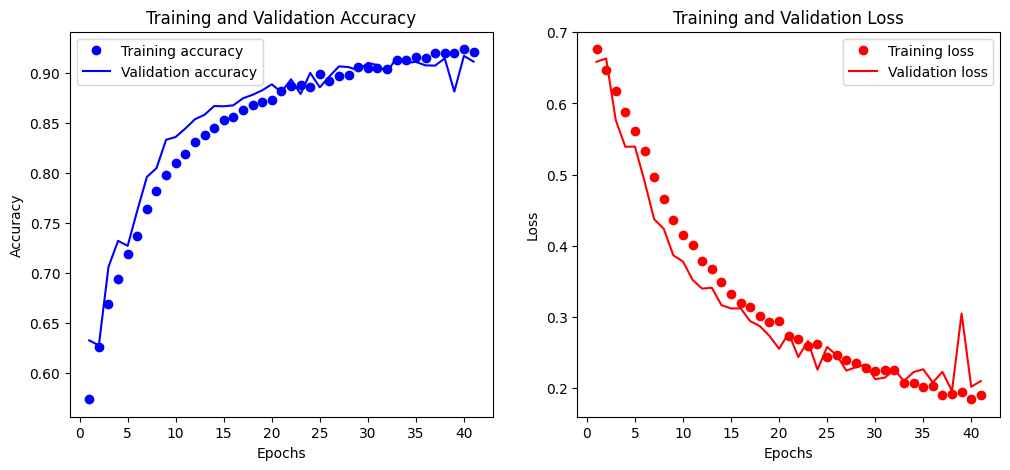

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Load the pre-split dataset with data augmentation for training
base_dir = Path("/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_large")
improved_model_train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(180, 180),
    batch_size=32)

improved_model_validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)

improved_model_test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2)
    ])

inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

improved_model = keras.Model(inputs=inputs, outputs=outputs)

improved_model.summary()

# Compile the model with a learning rate reduction callback
improved_model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

improved_model_callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="improved_model.keras",
        save_best_only=True,
        monitor="val_loss"  # Tracks the validation loss
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=3,  # Stop if no improvement after 5 epochs
        restore_best_weights=True
    )
]

improved_model_history = improved_model.fit(
    improved_model_train_dataset,
    epochs=100,
    callbacks=improved_model_callbacks,
    validation_data=improved_model_validation_dataset
)

# Plot training vs. validation accuracy and loss
def plot_training_history(improved_model_history):
    epochs = range(1, len(improved_model_history.history['accuracy']) + 1)
    
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, improved_model_history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, improved_model_history.history['val_accuracy'], 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, improved_model_history.history['loss'], 'ro', label='Training loss')
    plt.plot(epochs, improved_model_history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_training_history(improved_model_history)

 40/125 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9244 - loss: 0.1999

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


 75/125 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9239 - loss: 0.1967

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9233 - loss: 0.1985
Test accuracy: 0.9193
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


2024-11-10 21:37:57.990789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


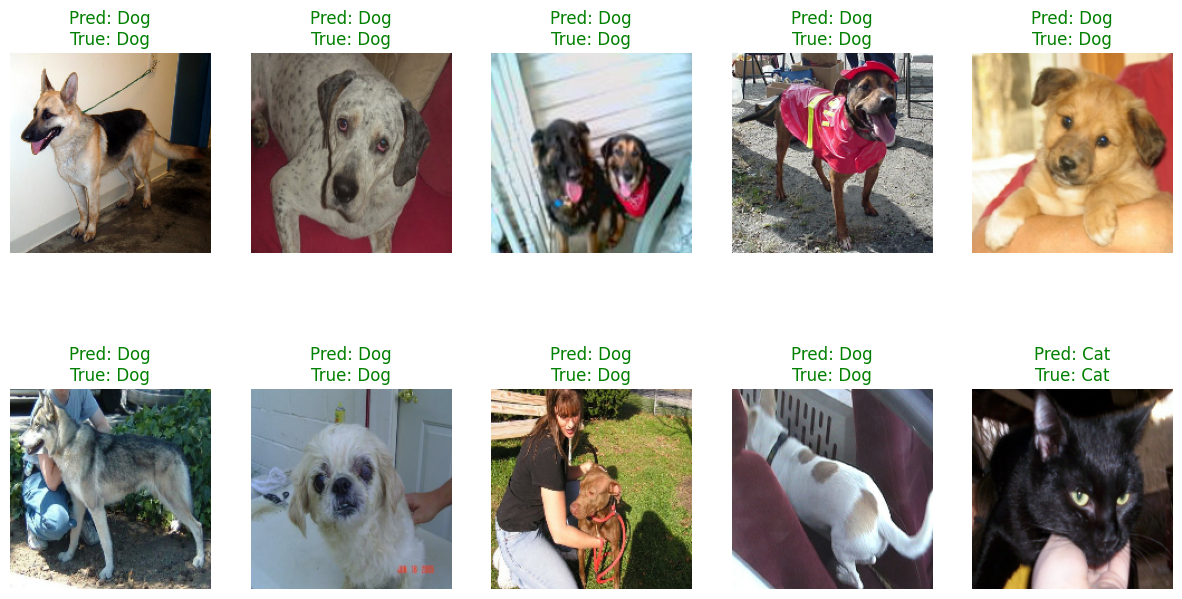

In [4]:
improved_model_best_loss = keras.models.load_model("improved_model.keras")
improved_model_test_loss, improved_model_test_acc = improved_model_best_loss.evaluate(improved_model_test_dataset)
print(f"Test accuracy: {improved_model_test_acc:.4f}")

# Generate and plot confusion matrix
#improved_model_best_loss_predictions = improved_model_best_loss.predict(improved_model_test_dataset)
#improved_model_best_loss_predicted_labels = np.where(improved_model_best_loss_predictions > 0.5, 1, 0).flatten()  # Binary classification
#improved_model_best_loss_true_labels = np.concatenate([y for x, y in improved_model_test_dataset], axis=0)

#print(classification_report(improved_model_best_loss_true_labels, improved_model_best_loss_predicted_labels))

#improved_model_best_loss_cm = confusion_matrix(improved_model_best_loss_true_labels, improved_model_best_loss_predicted_labels)
#improved_model_best_loss_disp = ConfusionMatrixDisplay(confusion_matrix=improved_model_best_loss_cm, display_labels=improved_model_test_dataset.class_names)
#improved_model_best_loss_disp.plot(cmap=plt.cm.Blues)
#plt.title("Improve Model (Best loss) Confusion Matrix for Cats vs Dogs")
#plt.show()

# Function to visualize predictions
def plot_predictions(model, dataset, class_names, num_images=10):
    plt.figure(figsize=(15, 8))
    for images, labels in dataset.take(1):  # Take a single batch
        predictions = model.predict(images)
        predicted_labels = np.where(predictions.flatten() > 0.5, 1, 0)  # Apply cutoff for binary classification

        for i in range(num_images):
            ax = plt.subplot(2, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[int(labels[i])]
            predicted_label = class_names[predicted_labels[i]]
            color = "green" if predicted_label == true_label else "red"
            plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
            plt.axis("off")
    plt.show()

# Define class names based on your dataset structure
class_names = improved_model_test_dataset.class_names  # ['Cat', 'Dog'] based on folder names

# Visualize predictions on the test dataset
plot_predictions(improved_model_best_loss, improved_model_test_dataset, class_names)

## VGG16 Model: Small Dataset

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
51/63 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.7488 - loss: 6.0493

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - accuracy: 0.7702 - loss: 5.3978 - val_accuracy: 0.9280 - val_loss: 0.8906
Epoch 2/50
59/63 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9718 - loss: 0.3870

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.9713 - loss: 0.3893 - val_accuracy: 0.9400 - val_loss: 0.7486
Epoch 3/50
45/63 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.9735 - loss: 0.3344

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - accuracy: 0.9740 - loss: 0.3197 - val_accuracy: 0.9380 - val_loss: 0.7632
Epoch 4/50
52/63 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9865 - loss: 0.1928

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.9865 - loss: 0.1802 - val_accuracy: 0.9360 - val_loss: 0.7241
Epoch 5/50
60/63 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9883 - loss: 0.0670

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.9881 - loss: 0.0685 - val_accuracy: 0.9420 - val_loss: 0.8080
Epoch 6/50
46/63 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.9869 - loss: 0.0880

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.9869 - loss: 0.0911 - val_accuracy: 0.9320 - val_loss: 0.7140
Epoch 7/50
54/63 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.9970 - loss: 0.0149

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.9965 - loss: 0.0189 - val_accuracy: 0.9320 - val_loss: 0.7817
Epoch 8/50
59/63 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9954 - loss: 0.0569

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.9951 - loss: 0.0570 - val_accuracy: 0.9380 - val_loss: 0.7459
Epoch 9/50
53/63 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9920 - loss: 0.0423

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - accuracy: 0.9923 - loss: 0.0416 - val_accuracy: 0.9460 - val_loss: 0.7192


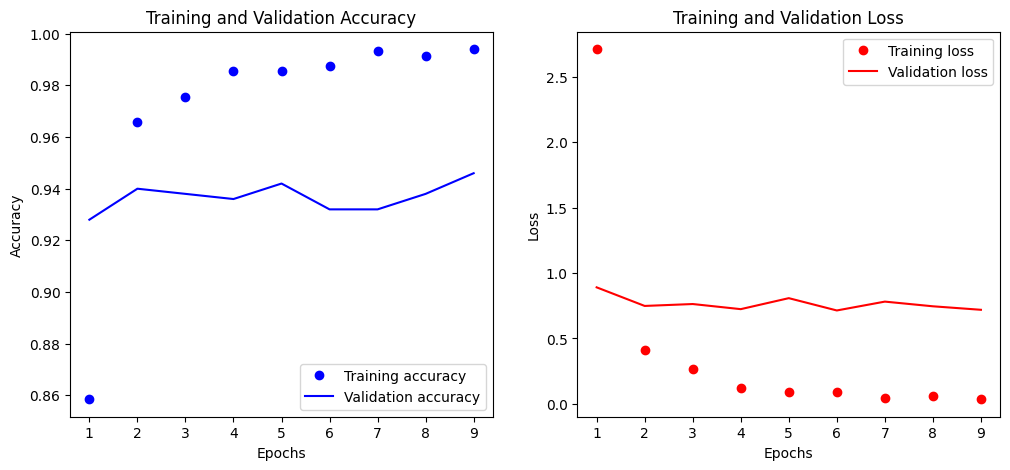

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# Paths to your dataset directories
train_dir = "/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_small/train"
val_dir = "/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_small/validation"
test_dir = "/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_small/test"

# Load datasets
vgg16_small_train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32
)

vgg16_small_validation_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(180, 180),
    batch_size=32
)

vgg16_small_test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32
)

# Load the VGG16 model with pre-trained ImageNet weights, without the top (classifier) layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
vgg16.trainable = False  # Freeze the base model

# Build the model
inputs = tf.keras.Input(shape=(180, 180, 3))
x = vgg16(inputs, training=False)  # Pass the inputs through the base model
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification (cats vs. dogs)

# Create the final model
vgg16_small_model = models.Model(inputs, outputs)

vgg16_small_model.summary()

# Compile the model
vgg16_small_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

vgg16_small_model_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="vgg16_small_model.keras",
        save_best_only=True,
        monitor="val_loss"  # Tracks the validation loss),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=3,  # Stop if no improvement after 7 epochs
        restore_best_weights=True)
]

# Train the model
vgg16_small_model_history = vgg16_small_model.fit(
    vgg16_small_train_dataset,
    validation_data=vgg16_small_validation_dataset,
    epochs=50,  # Corrected from epoch=50 to epochs=50
    callbacks=vgg16_small_model_callbacks)

# Plot training vs. validation accuracy and loss
def plot_training_history(vgg16_model_history):
    epochs = range(1, len(vgg16_model_history.history['accuracy']) + 1)
    
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, vgg16_small_model_history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, vgg16_small_model_history.history['val_accuracy'], 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, vgg16_small_model_history.history['loss'], 'ro', label='Training loss')
    plt.plot(epochs, vgg16_small_model_history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_training_history(vgg16_small_model_history)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.9466 - loss: 0.5522
Test accuracy: 0.9460
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


2024-11-10 21:42:03.444981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


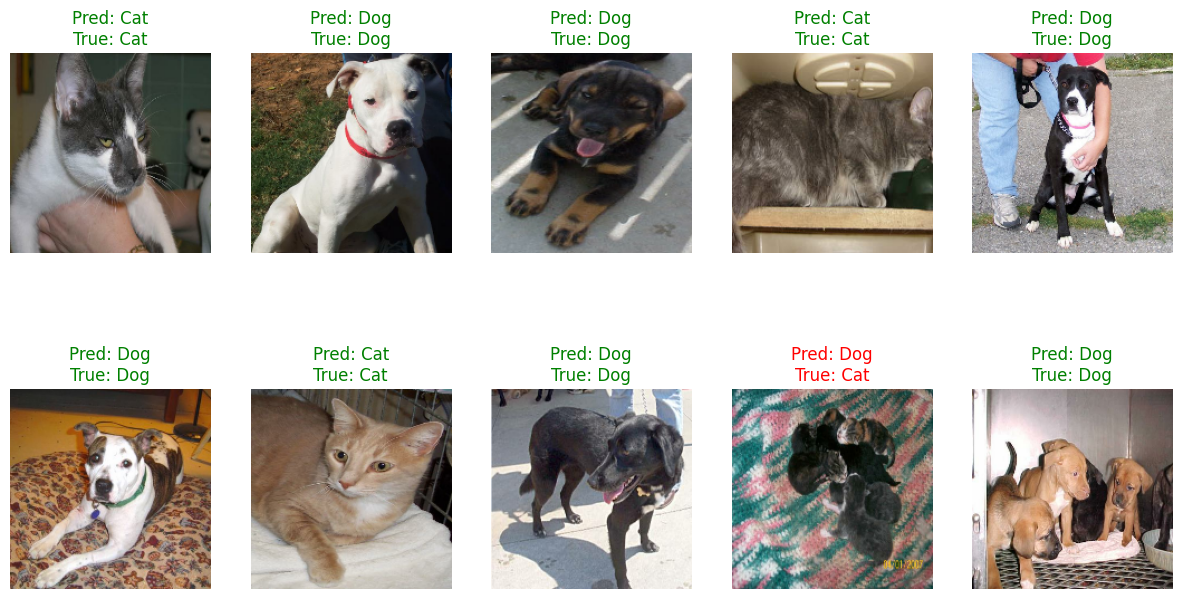

In [6]:
# Evaluate the model on the test dataset
vgg16_small_model_best_loss = keras.models.load_model("vgg16_small_model.keras")
vgg16_small_test_loss, vgg16_small_test_acc = vgg16_small_model.evaluate(vgg16_small_test_dataset)
print(f"Test accuracy: {vgg16_small_test_acc:.4f}")

# Function to visualize predictions
def plot_predictions(model, dataset, class_names, num_images=10):
    plt.figure(figsize=(15, 8))
    for images, labels in dataset.take(1):  # Take a single batch
        predictions = model.predict(images)
        predicted_labels = np.where(predictions.flatten() > 0.5, 1, 0)  # Apply cutoff for binary classification

        for i in range(num_images):
            ax = plt.subplot(2, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[int(labels[i])]
            predicted_label = class_names[predicted_labels[i]]
            color = "green" if predicted_label == true_label else "red"
            plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
            plt.axis("off")
    plt.show()

# Define class names based on your dataset structure
class_names = vgg16_small_test_dataset.class_names  # ['Cat', 'Dog'] based on folder names

# Visualize predictions on the test dataset
plot_predictions(improved_model_best_loss, vgg16_small_test_dataset, class_names)

## VGG16 Model: Large Dataset

Found 12000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/50
 30/375 ━━━━━━━━━━━━━━━━━━━━ 59s 172ms/step - accuracy: 0.7154 - loss: 5.7667

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 86/375 ━━━━━━━━━━━━━━━━━━━━ 49s 172ms/step - accuracy: 0.8052 - loss: 3.7179

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 95/375 ━━━━━━━━━━━━━━━━━━━━ 48s 172ms/step - accuracy: 0.8125 - loss: 3.5597

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


181/375 ━━━━━━━━━━━━━━━━━━━━ 33s 172ms/step - accuracy: 0.8526 - loss: 2.6812

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


200/375 ━━━━━━━━━━━━━━━━━━━━ 30s 172ms/step - accuracy: 0.8578 - loss: 2.5653

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8850 - loss: 1.9259

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 86s 228ms/step - accuracy: 0.8851 - loss: 1.9235 - val_accuracy: 0.9563 - val_loss: 0.2421
Epoch 2/50
 30/375 ━━━━━━━━━━━━━━━━━━━━ 59s 172ms/step - accuracy: 0.9492 - loss: 0.2574

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 93/375 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step - accuracy: 0.9578 - loss: 0.2212

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


118/375 ━━━━━━━━━━━━━━━━━━━━ 44s 173ms/step - accuracy: 0.9594 - loss: 0.2130

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


165/375 ━━━━━━━━━━━━━━━━━━━━ 36s 172ms/step - accuracy: 0.9613 - loss: 0.1997

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


199/375 ━━━━━━━━━━━━━━━━━━━━ 30s 172ms/step - accuracy: 0.9622 - loss: 0.1929

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9646 - loss: 0.1725

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 227ms/step - accuracy: 0.9646 - loss: 0.1724 - val_accuracy: 0.9622 - val_loss: 0.1770
Epoch 3/50
 27/375 ━━━━━━━━━━━━━━━━━━━━ 1:01 177ms/step - accuracy: 0.9785 - loss: 0.0716

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 75/375 ━━━━━━━━━━━━━━━━━━━━ 51s 173ms/step - accuracy: 0.9769 - loss: 0.0883

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 91/375 ━━━━━━━━━━━━━━━━━━━━ 49s 173ms/step - accuracy: 0.9769 - loss: 0.0885

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


163/375 ━━━━━━━━━━━━━━━━━━━━ 36s 171ms/step - accuracy: 0.9773 - loss: 0.0901

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


201/375 ━━━━━━━━━━━━━━━━━━━━ 29s 171ms/step - accuracy: 0.9774 - loss: 0.0893

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9780 - loss: 0.0851

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 225ms/step - accuracy: 0.9780 - loss: 0.0851 - val_accuracy: 0.9635 - val_loss: 0.1789
Epoch 4/50
 25/375 ━━━━━━━━━━━━━━━━━━━━ 59s 170ms/step - accuracy: 0.9910 - loss: 0.0350

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 73/375 ━━━━━━━━━━━━━━━━━━━━ 51s 170ms/step - accuracy: 0.9893 - loss: 0.0337

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


101/375 ━━━━━━━━━━━━━━━━━━━━ 46s 170ms/step - accuracy: 0.9890 - loss: 0.0337

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


165/375 ━━━━━━━━━━━━━━━━━━━━ 35s 169ms/step - accuracy: 0.9883 - loss: 0.0355

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


217/375 ━━━━━━━━━━━━━━━━━━━━ 26s 169ms/step - accuracy: 0.9881 - loss: 0.0364

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9878 - loss: 0.0376

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 224ms/step - accuracy: 0.9878 - loss: 0.0376 - val_accuracy: 0.9653 - val_loss: 0.1908
Epoch 5/50
 25/375 ━━━━━━━━━━━━━━━━━━━━ 1:01 176ms/step - accuracy: 0.9820 - loss: 0.0380

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


 96/375 ━━━━━━━━━━━━━━━━━━━━ 48s 175ms/step - accuracy: 0.9871 - loss: 0.0301

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


 99/375 ━━━━━━━━━━━━━━━━━━━━ 48s 175ms/step - accuracy: 0.9871 - loss: 0.0301

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


174/375 ━━━━━━━━━━━━━━━━━━━━ 34s 173ms/step - accuracy: 0.9880 - loss: 0.0342

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


206/375 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - accuracy: 0.9880 - loss: 0.0354

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9884 - loss: 0.0377

Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 227ms/step - accuracy: 0.9884 - loss: 0.0377 - val_accuracy: 0.9645 - val_loss: 0.2041


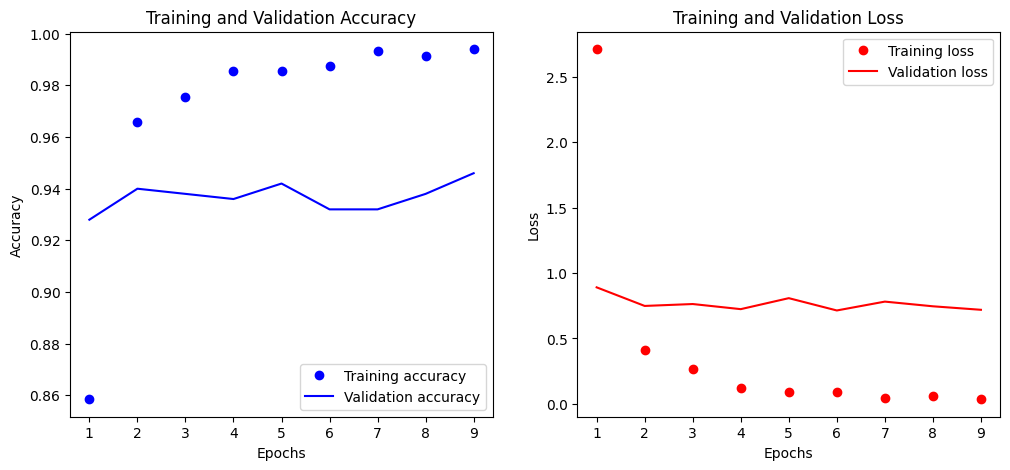

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


# Paths to your dataset directories
train_dir = "/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_large/train"
val_dir = "/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_large/validation"
test_dir = "/Users/sieng/Documents/Study/MS.Business Analytics/FALL 2024/AML/Assignment/Assignment 3/cats_vs_dogs_large/test"

# Load datasets
vgg16_large_train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=32
)

vgg16_large_validation_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(180, 180),
    batch_size=32
)

vgg16_large_test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32
)

# Load the VGG16 model with pre-trained ImageNet weights, without the top (classifier) layers
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
vgg16.trainable = False  # Freeze the base model

# Build the model
inputs = tf.keras.Input(shape=(180, 180, 3))
x = vgg16(inputs, training=False)  # Pass the inputs through the base model
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification (cats vs. dogs)

# Create the final model
vgg16_large_model = models.Model(inputs, outputs)

vgg16_large_model.summary()

# Compile the model
vgg16_large_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

vgg16_large_model_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="vgg16_large_model.keras",
        save_best_only=True,
        monitor="val_loss"  # Tracks the validation loss),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=3,  # Stop if no improvement after 7 epochs
        restore_best_weights=True)
]

# Train the model
vgg16_large_model_history = vgg16_large_model.fit(
    vgg16_large_train_dataset,
    validation_data=vgg16_large_validation_dataset,
    epochs=50,  # Corrected from epoch=50 to epochs=50
    callbacks=vgg16_large_model_callbacks
)

# Plot training vs. validation accuracy and loss
def plot_training_history(vgg16_large_model_history):
    epochs = range(1, len(vgg16_large_model_history.history['accuracy']) + 1)
    
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, vgg16_large_model_history.history['accuracy'], 'bo', label='Training accuracy')
    plt.plot(epochs, vgg16_large_model_history.history['val_accuracy'], 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, vgg16_large_model_history.history['loss'], 'ro', label='Training loss')
    plt.plot(epochs, vgg16_large_model_history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_training_history(vgg16_small_model_history)


 52/125 ━━━━━━━━━━━━━━━━━━━━ 12s 165ms/step - accuracy: 0.9675 - loss: 0.1468

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


102/125 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9664 - loss: 0.1484

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.9656 - loss: 0.1527
Test accuracy: 0.9622
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


2024-11-10 22:05:21.310058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


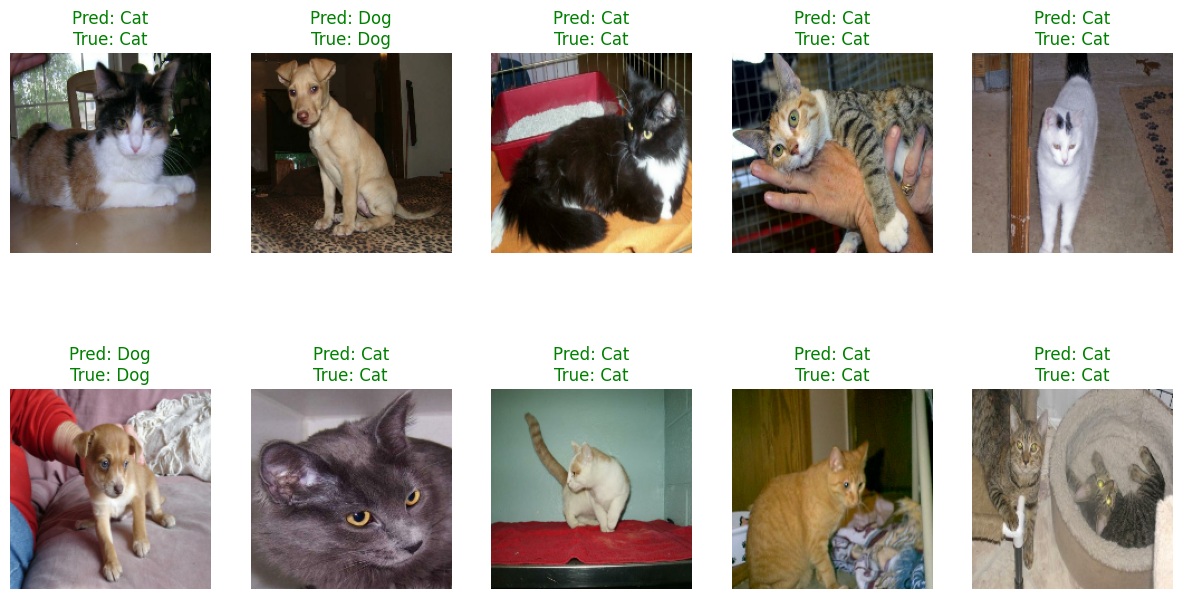

In [10]:
vgg16_large_model_best_loss = keras.models.load_model("vgg16_large_model.keras")
vgg16_large_test_loss, vgg16_large_test_acc = vgg16_large_model_best_loss.evaluate(vgg16_large_test_dataset)
print(f"Test accuracy: {vgg16_large_test_acc:.4f}")

# Function to visualize predictions
def plot_predictions(model, dataset, class_names, num_images=10):
    plt.figure(figsize=(15, 8))
    for images, labels in dataset.take(1):  # Take a single batch
        predictions = model.predict(images)
        predicted_labels = np.where(predictions.flatten() > 0.5, 1, 0)  # Apply cutoff for binary classification

        for i in range(num_images):
            ax = plt.subplot(2, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            true_label = class_names[int(labels[i])]
            predicted_label = class_names[predicted_labels[i]]
            color = "green" if predicted_label == true_label else "red"
            plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
            plt.axis("off")
    plt.show()

# Define class names based on your dataset structure
class_names = vgg16_large_test_dataset.class_names  # ['Cat', 'Dog'] based on folder names

# Visualize predictions on the test dataset
plot_predictions(vgg16_large_model_best_loss, vgg16_large_test_dataset, class_names)

## Conclusion

In [15]:
import pandas as pd

# Define the data
data = {
    "Model": ["Base Model", "Adjusted Base Model", "Improved Adjusted Base Model", "Improved Model", "VGG16 Model: small", "VGG16 Model: large"],
    "Dataset": ["Super Small", "Small", "Small", "Large", "Small", "Large"],
    "Training Size": [1000, 2000, 2000, 12000, 2000, 12000],
    "Validation Size": [500, 500, 500, 4000, 500, 4000],
    "Testing Size": [500, 500, 500, 4000, 500, 4000],
    "Data Augmentation Process": ["No", "No", "Yes", "Yes", "Yes", "Yes"],
    "Number of Layers": [5, 5, 6, 7, 16, 16],
    "Highest Number of Nodes": [256, 256, 512, 512, 512, 512],
    "Optimizer": ["rmsprop", "rmsprop", "adam", "adam", "adam", "adam"],
    "Learning Rate Adjustable": ["No", "No", "No", "Yes", "Yes", "Yes"],
    "Validation Accuracy": ["64.2%", "73.4%", "80.2%", "91.15%", "93.2%", "96.22%"],
    "Testing Accuracy": ["69.4%", "72.2%", "80.0%", "91.93%", "94.6%", "96.7%"],
    "Epochs": [14, 11, 56, 38, 6, 2]
}

# Create the DataFrame and set "Model" as the index, then transpose
df = pd.DataFrame(data).set_index("Model").T

# Style the transposed DataFrame for display
styled_df = df.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#4F81BD'), ('color', 'white'), ('font-weight', 'bold')]},
     {'selector': 'tbody td', 'props': [('padding', '8px'), ('border', '1px solid #DDDDDD')]}]
).set_properties(**{
    'text-align': 'center',
    'border-collapse': 'collapse'
}).set_caption("Model Comparison Table").format(precision=0)

styled_df